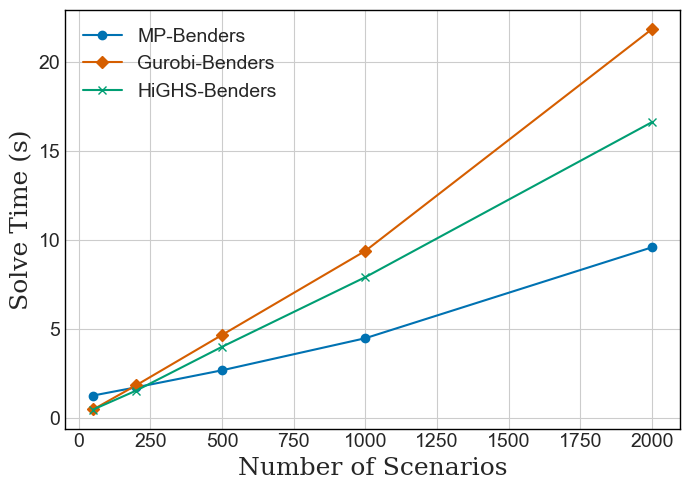

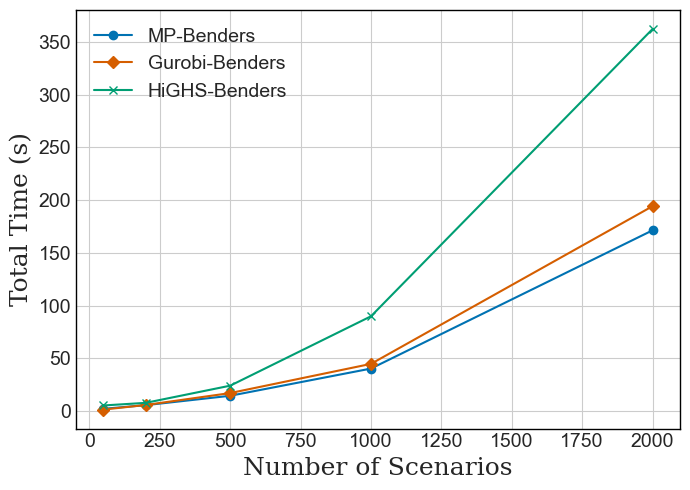

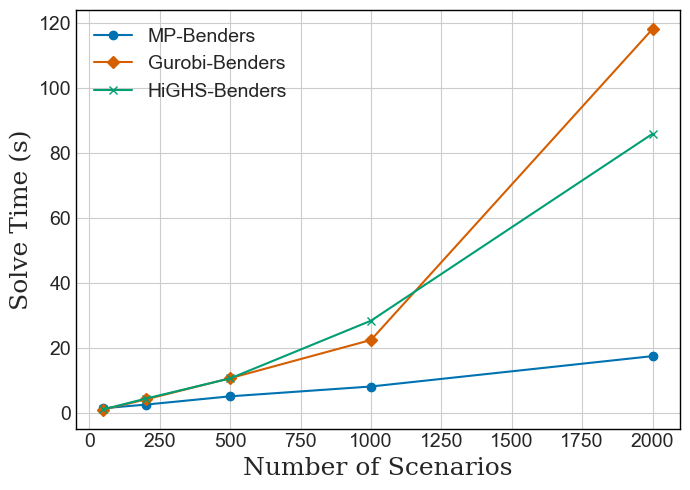

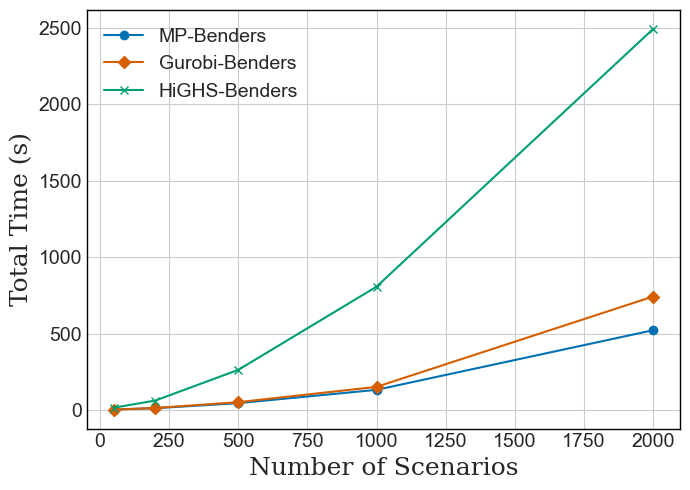

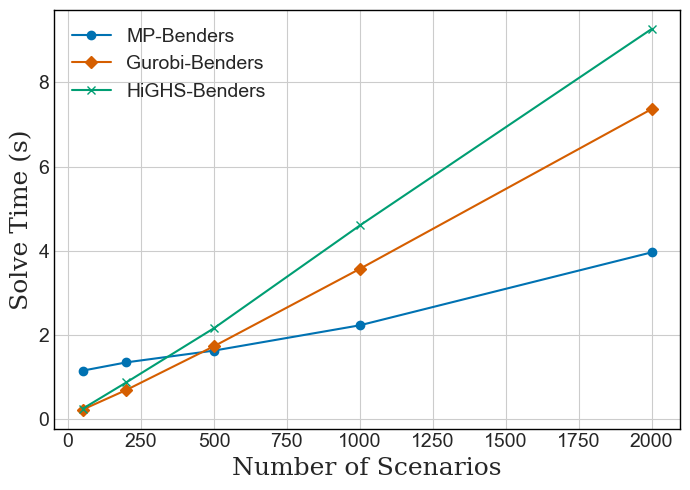

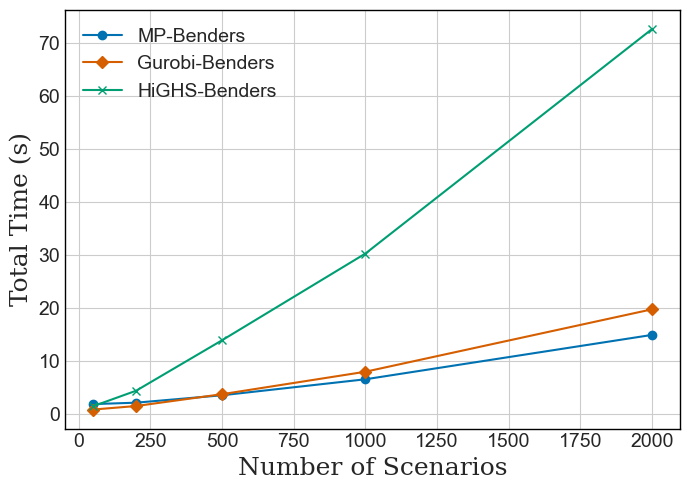

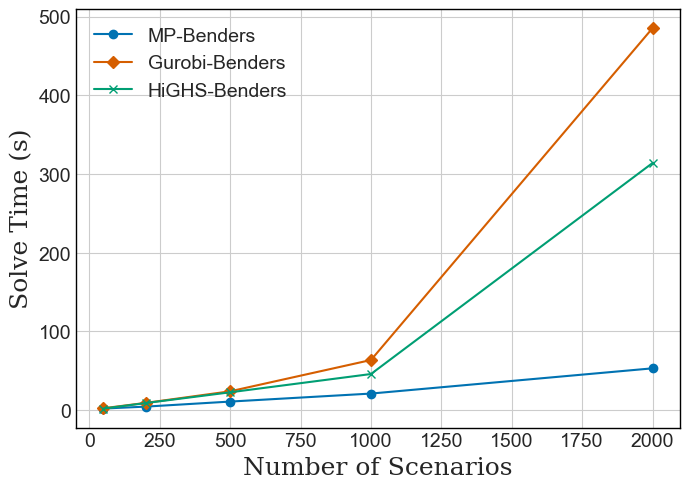

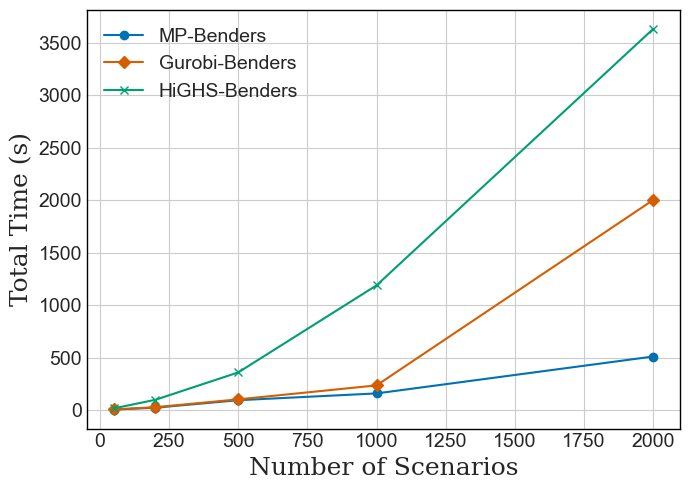

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# --- Main Customization Area ---
plot_params = {
    'font_style': 'serif',
    'title_fontsize': 16,
    'label_fontsize': 18,
    'tick_labelsize': 14,
    'legend_fontsize': 14,
    'border_color': 'black',
    'border_linewidth': 1,
    'figure_size': (7, 5),
    'style': 'seaborn-v0_8-whitegrid'
}

# Use the specified style
plt.style.use(plot_params['style'])

marker_map = {
    'MP-Benders': 'o',     # Circle
    'Gurobi-Benders': 'D', # Square
    'HiGHS-Benders': 'x'   # Diamond
}

def create_and_style_plot(ax, df, data_cols, labels, title, xlabel, ylabel, config):
    """
    Generates and styles a single plot based on the provided configuration.
    """
    for col in data_cols:
        current_label = labels[col]
        ax.plot(
            df['scens'], 
            df[col], 
            marker=marker_map[current_label],  # Use marker map
            label=current_label, 
            color=color_map[current_label]
        )

    ax.set_title(title, fontsize=config['title_fontsize'], fontname=config['font_style'])
    ax.set_xlabel(xlabel, fontsize=config['label_fontsize'], fontname=config['font_style'])
    ax.set_ylabel(ylabel, fontsize=config['label_fontsize'], fontname=config['font_style'])
    ax.tick_params(axis='both', which='major', labelsize=config['tick_labelsize'])
    for spine in ax.spines.values():
        spine.set_edgecolor(config['border_color'])
        spine.set_linewidth(config['border_linewidth'])
    ax.legend(fontsize=config['legend_fontsize'])
    ax.grid(True)

# --- Data Processing and Plotting Loop ---

# Column names and labels
solve_cols = [
    'MP_Gurobi_solve',
    'Plasmo_Gurobi_solve',
    'Plasmo_HiGHS_solve',
]
total_cols = [
    'MP_Gurobi_total',
    'Plasmo_Gurobi_total',
    'Plasmo_HiGHS_total',
]
solver_labels = {
    'MP_Gurobi_solve': 'MP-Benders',
    'Plasmo_Gurobi_solve': 'Gurobi-Benders',
    'MP_Gurobi_total': 'MP-Benders',
    'Plasmo_Gurobi_total': 'Gurobi-Benders',
    'Plasmo_HiGHS_solve': 'HiGHS-Benders',
    'Plasmo_HiGHS_total': 'HiGHS-Benders'
}

# NEW: Define your colors here
# Assign a color to each label used in the plots.
color_map = {
    'MP-Benders': '#0072B2',     # A nice blue
    'Gurobi-Benders': '#D55E00',  # A nice orange
    'HiGHS-Benders': '#009E73'   # A nice green
}


# Create folder for plots
os.makedirs("timing_plots_mp", exist_ok=True)

# List of files
csv_files = sorted(glob.glob("timing_results_time*.csv"))

for file in csv_files:
    df = pd.read_csv(file)
    time_tag = os.path.splitext(os.path.basename(file))[0].replace("timing_results_time", "")

    # Add 1.1 sec to MP solve and total times
    df['MP_Gurobi_solve'] += 1.1
    df['MP_Gurobi_total'] += 1.1

    # --- Solve time plot ---
    fig1, ax1 = plt.subplots(figsize=plot_params['figure_size'])
    create_and_style_plot(
        ax=ax1,
        df=df,
        data_cols=solve_cols,
        labels=solver_labels,
        # title=f"Subproblem Solve Time vs. Scenarios (time period: {time_tag})",
        title=f"",
        xlabel="Number of Scenarios",
        ylabel="Solve Time (s)",
        config=plot_params
    )
    fig1.tight_layout()
    
    plt.show()

    # --- Total time plot ---
    fig2, ax2 = plt.subplots(figsize=plot_params['figure_size'])
    create_and_style_plot(
        ax=ax2,
        df=df,
        data_cols=total_cols,
        labels=solver_labels,
        # title=f"Total Time vs. Scenarios (time period: {time_tag})",
        title=f"",
        xlabel="Number of Scenarios",
        ylabel="Total Time (s)",
        config=plot_params
    )
    fig2.tight_layout()
    fig1.savefig(f"timing_plots_mp/solve_time_{time_tag}_mc.png", dpi=600)
    fig2.savefig(f"timing_plots_mp/total_time_{time_tag}_mc.png", dpi=600)
    plt.show()

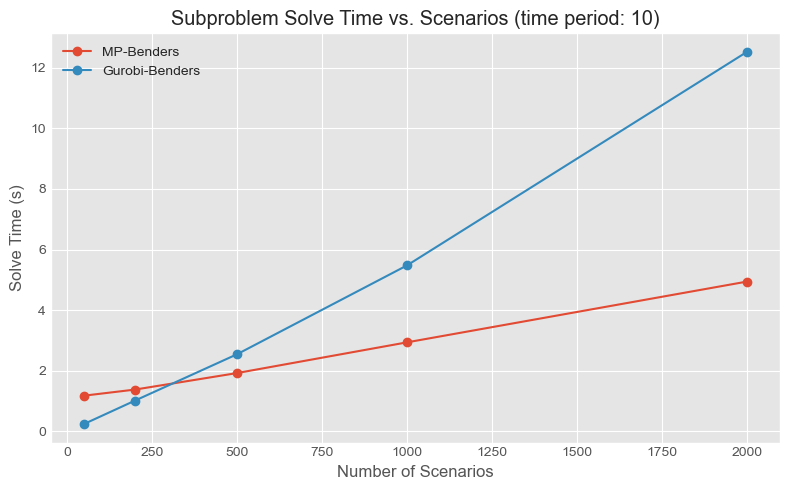

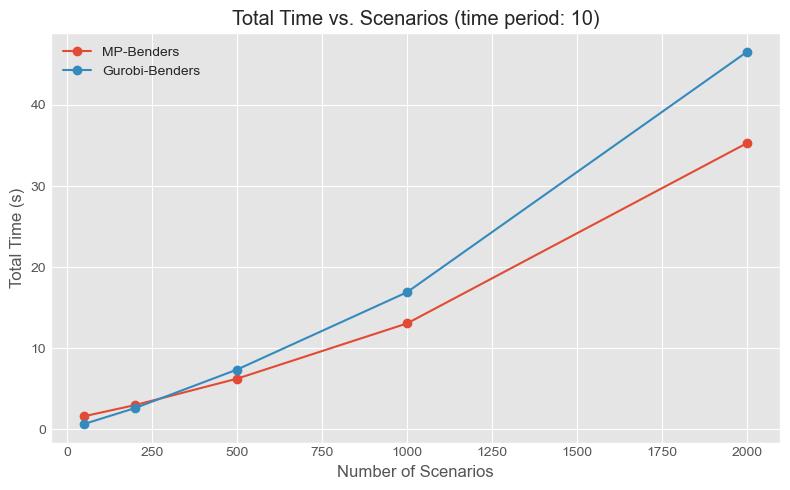

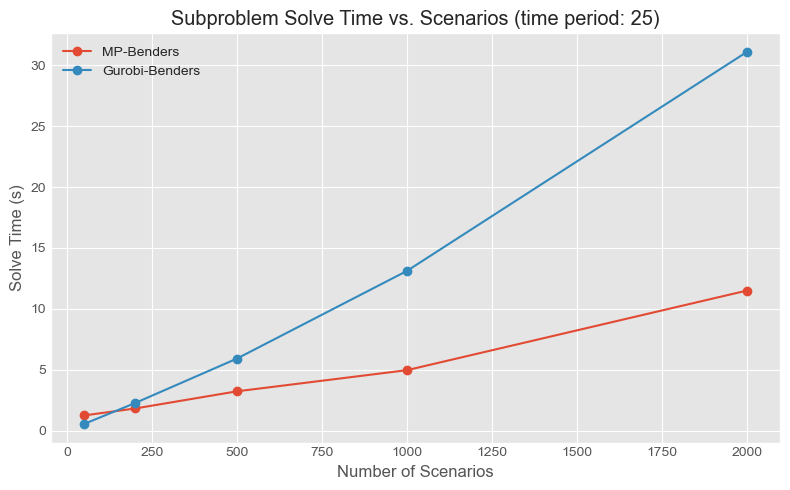

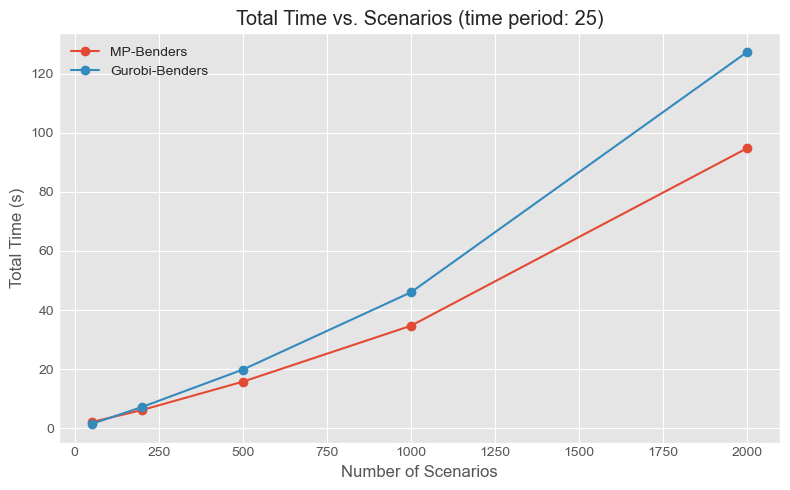

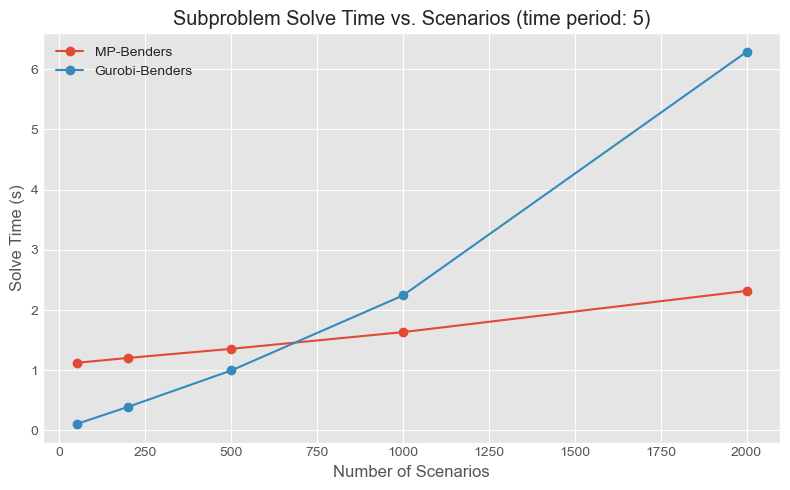

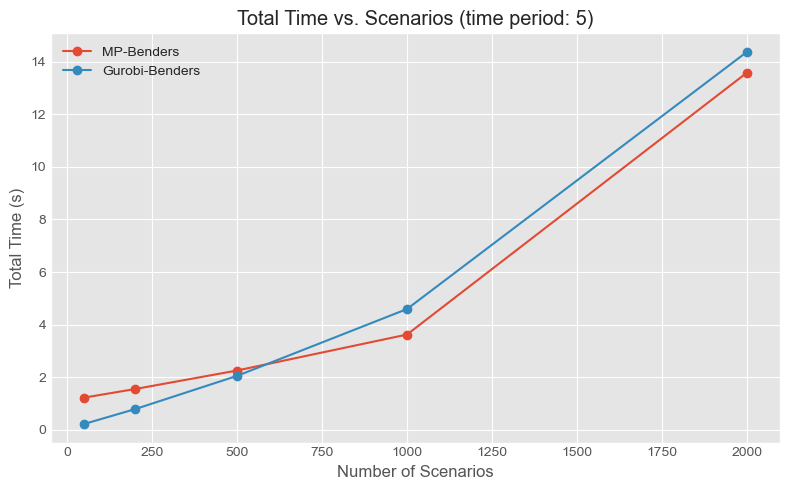

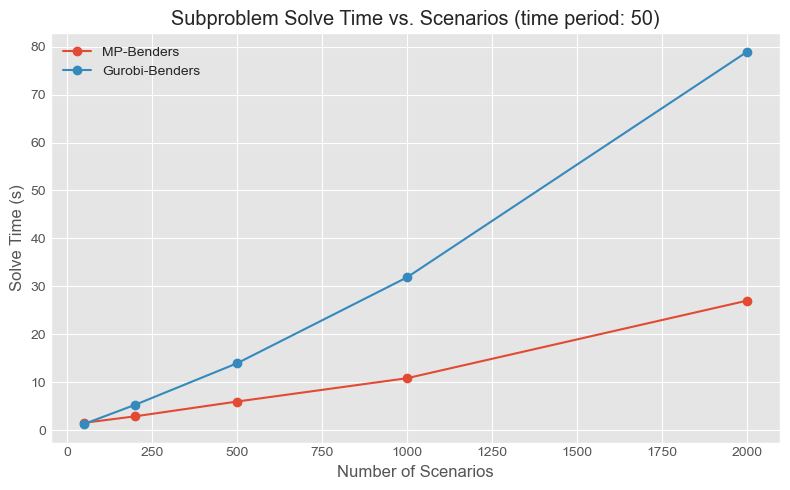

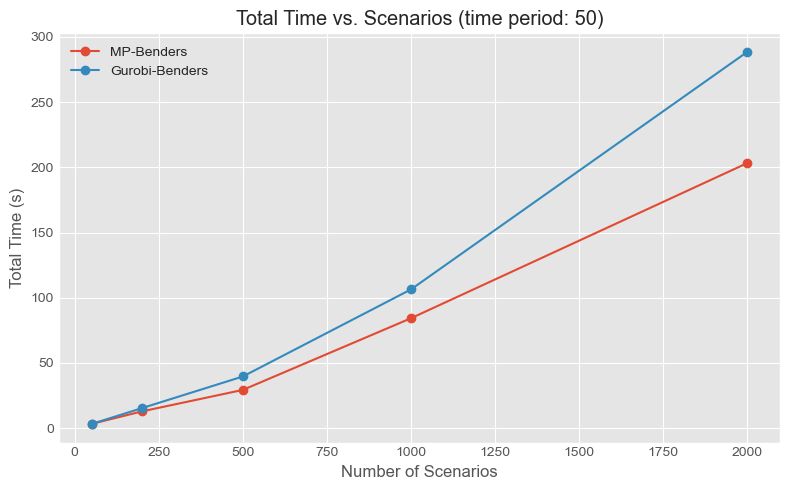

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Use built-in style
plt.style.use("ggplot")

# Column names and labels
solve_cols = [
    'MP_Gurobi_solve',
    'Plasmo_Gurobi_solve'
]
total_cols = [
    'MP_Gurobi_total',
    'Plasmo_Gurobi_total'
]
solver_labels = {
    'MP_Gurobi_solve': 'MP-Benders',
    'Plasmo_Gurobi_solve': 'Gurobi-Benders',
    'MP_Gurobi_total': 'MP-Benders',
    'Plasmo_Gurobi_total': 'Gurobi-Benders',
}

# Create folder for plots
os.makedirs("timing_plots_mp", exist_ok=True)

# List of files
csv_files = sorted(glob.glob("timing_results_time*.csv"))

for file in csv_files:
    df = pd.read_csv(file)
    time_tag = os.path.splitext(os.path.basename(file))[0].replace("timing_results_time", "")

    # Add 1.1 sec to MP solve and total times
    df['MP_Gurobi_solve'] += 1.1
    df['MP_Gurobi_total'] += 1.1

    # Solve time plot
    fig1, ax1 = plt.subplots(figsize=(8, 5))
    for col in solve_cols:
        ax1.plot(df['scens'][1:], df[col][1:], marker='o', label=solver_labels[col])
    ax1.set_title(f"Subproblem Solve Time vs. Scenarios (time period: {time_tag})")
    ax1.set_xlabel("Number of Scenarios")
    ax1.set_ylabel("Solve Time (s)")
    ax1.legend()
    ax1.grid(True)
    fig1.tight_layout()
    fig1.savefig(f"timing_plots_mp/solve_time_{time_tag}.png", dpi=300)
    plt.show()

    # Total time plot
    fig2, ax2 = plt.subplots(figsize=(8, 5))
    for col in total_cols:
        ax2.plot(df['scens'][1:], df[col][1:], marker='o', label=solver_labels[col])
    ax2.set_title(f"Total Time vs. Scenarios (time period: {time_tag})")
    ax2.set_xlabel("Number of Scenarios")
    ax2.set_ylabel("Total Time (s)")
    ax2.legend()
    ax2.grid(True)
    fig2.tight_layout()
    fig2.savefig(f"timing_plots_mp/total_time_{time_tag}.png", dpi=300)
    plt.show()


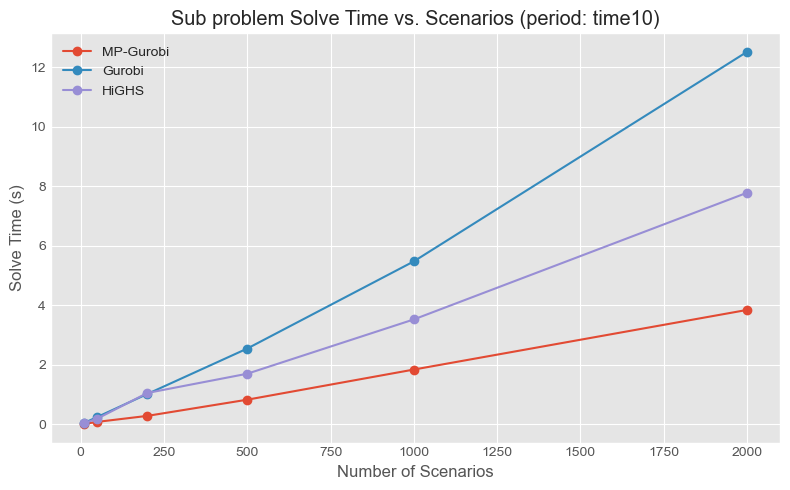

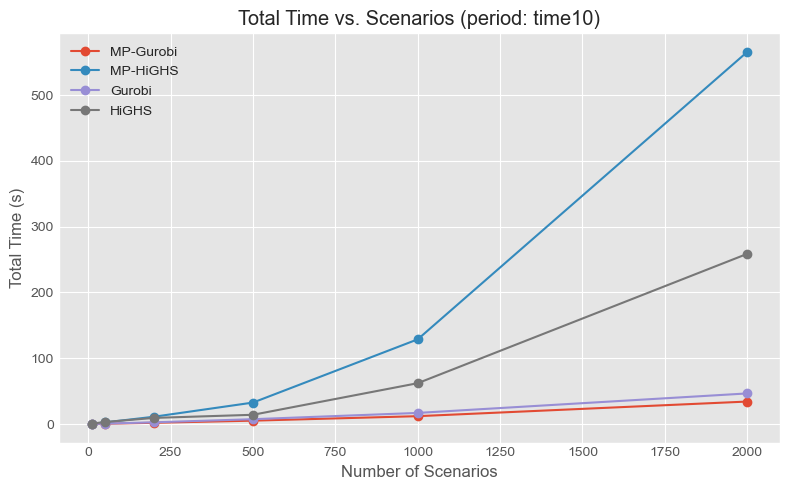

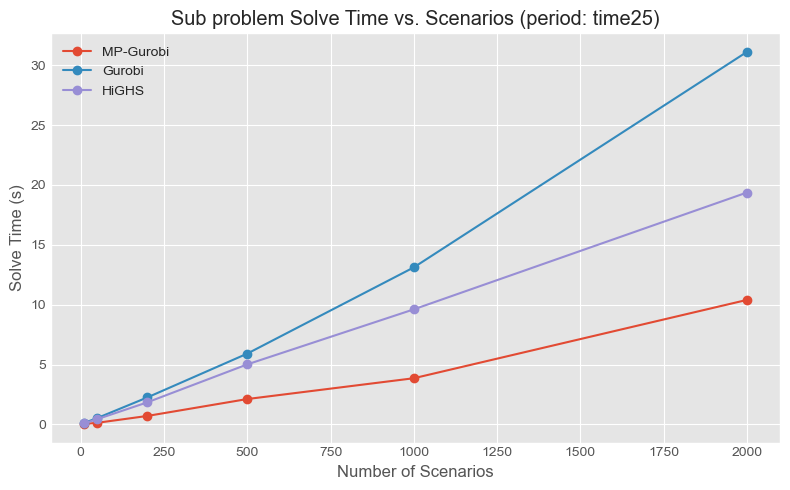

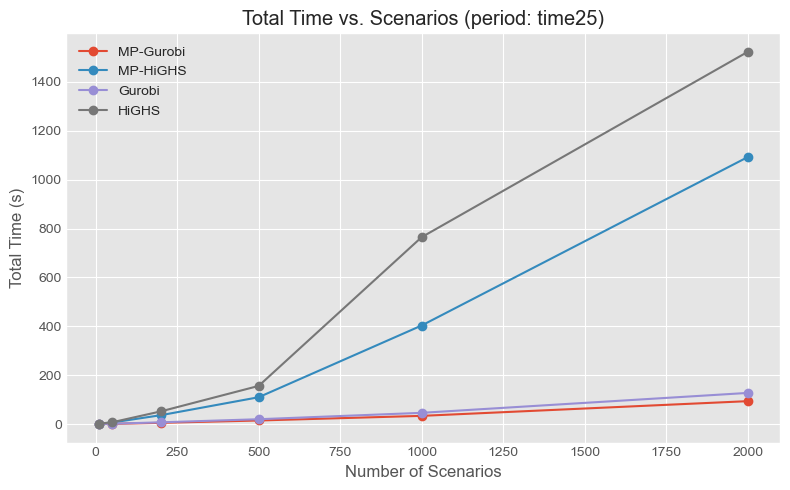

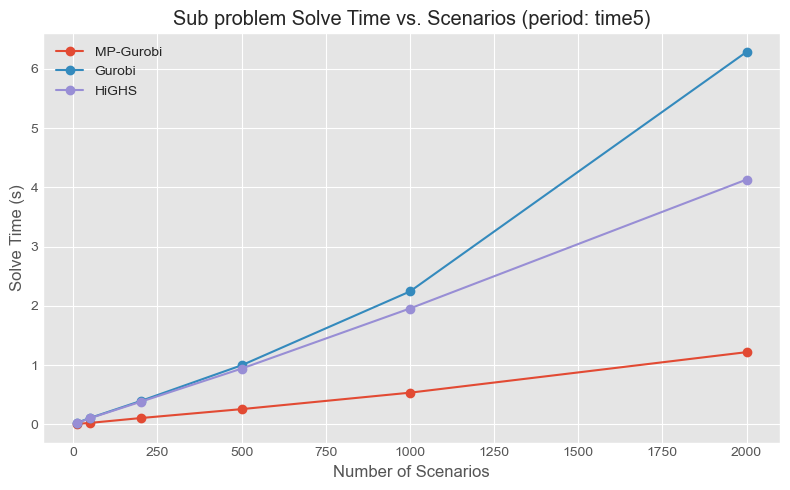

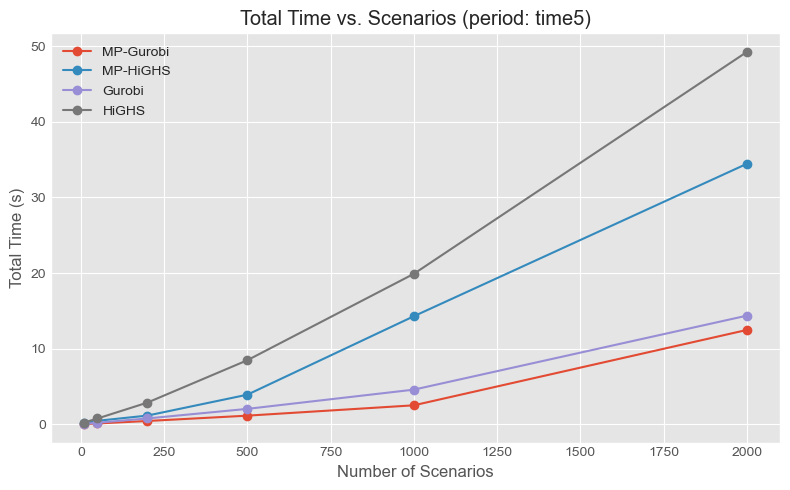

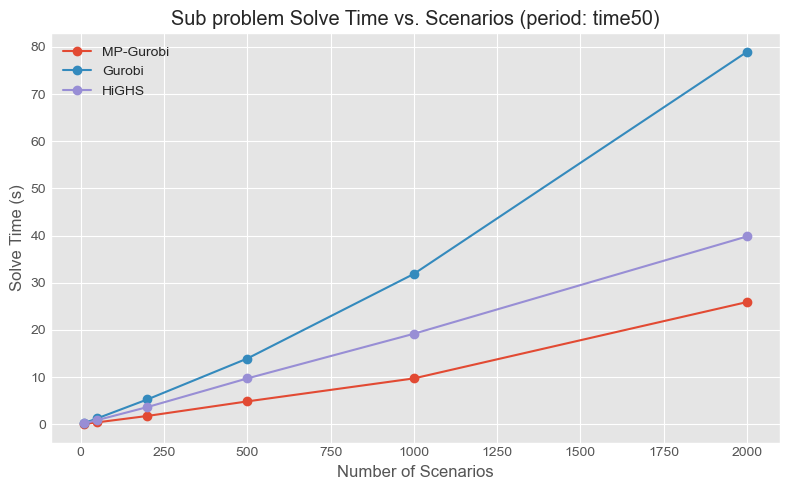

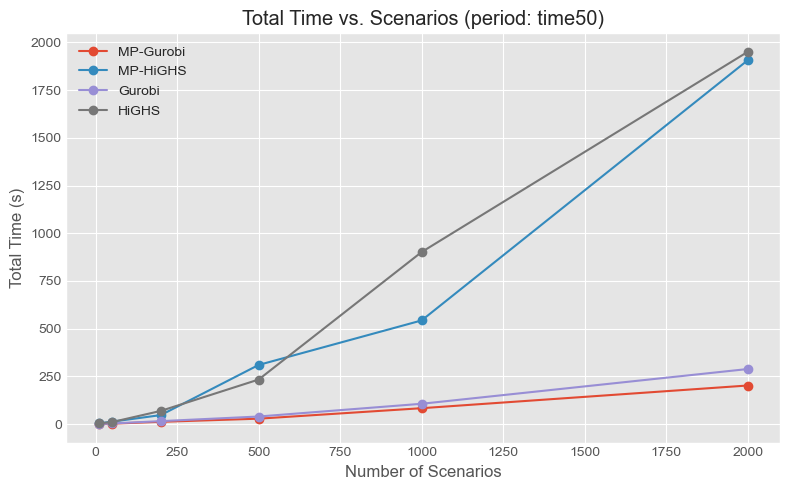

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Use a built-in style
plt.style.use("ggplot")

# Column names and labels
solve_cols = [
    'MP_Gurobi_solve',
    'Plasmo_Gurobi_solve', 'Plasmo_HiGHS_solve'
]
total_cols = [
    'MP_Gurobi_total', 'MP_HiGHS_total',
    'Plasmo_Gurobi_total', 'Plasmo_HiGHS_total'
]
solver_labels = {
    'MP_Gurobi_solve': 'MP-Gurobi',
    'Plasmo_Gurobi_solve': 'Gurobi',
    'Plasmo_HiGHS_solve': 'HiGHS',
    'MP_Gurobi_total': 'MP-Gurobi',
    'MP_HiGHS_total': 'MP-HiGHS',
    'Plasmo_Gurobi_total': 'Gurobi',
    'Plasmo_HiGHS_total': 'HiGHS',
}

# Create a folder to save figures
os.makedirs("timing_plots_mp", exist_ok=True)

# Process each file
csv_files = sorted(glob.glob("timing_results_time*.csv"))
for file in csv_files:
    df = pd.read_csv(file)
    time_tag = os.path.splitext(os.path.basename(file))[0].replace("timing_results_", "")

    # Solve time plot
    fig1, ax1 = plt.subplots(figsize=(8, 5))
    for col in solve_cols:
        ax1.plot(df['scens'], df[col], marker='o', label=solver_labels[col])
    ax1.set_title(f"Sub problem Solve Time vs. Scenarios (period: {time_tag})")
    ax1.set_xlabel("Number of Scenarios")
    ax1.set_ylabel("Solve Time (s)")
    ax1.legend()
    ax1.grid(True)
    fig1.tight_layout()
    # fig1.savefig(f"timing_plots_mp/solve_time_{time_tag}.png", dpi=300)
    plt.show()

    # Total time plot
    fig2, ax2 = plt.subplots(figsize=(8, 5))
    for col in total_cols:
        ax2.plot(df['scens'], df[col], marker='o', label=solver_labels[col])
    ax2.set_title(f"Total Time vs. Scenarios (period: {time_tag})")
    ax2.set_xlabel("Number of Scenarios")
    ax2.set_ylabel("Total Time (s)")
    ax2.legend()
    ax2.grid(True)
    fig2.tight_layout()
    # fig2.savefig(f"timing_plots_mp/total_time_{time_tag}.png", dpi=300)
    plt.show()


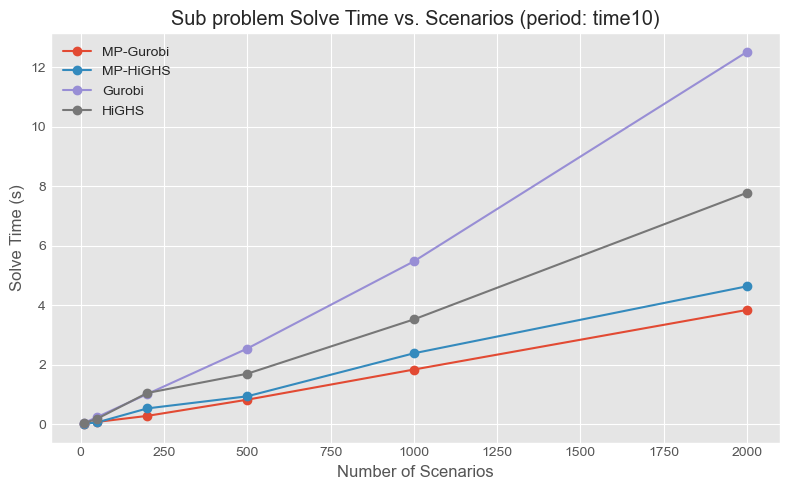

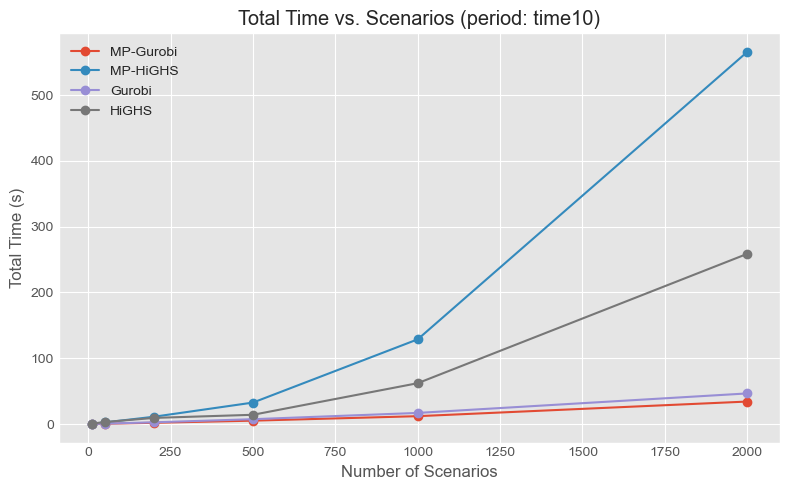

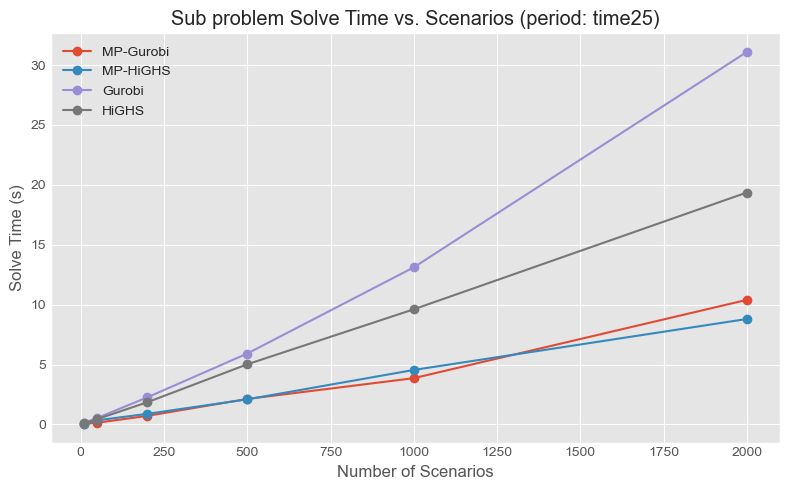

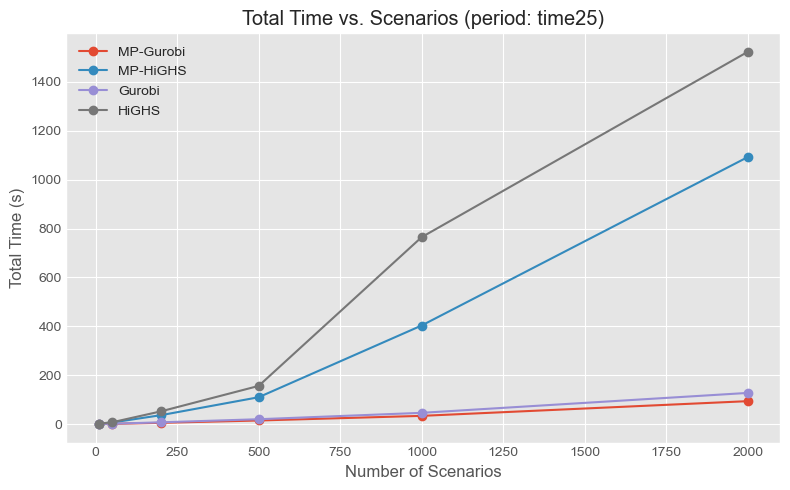

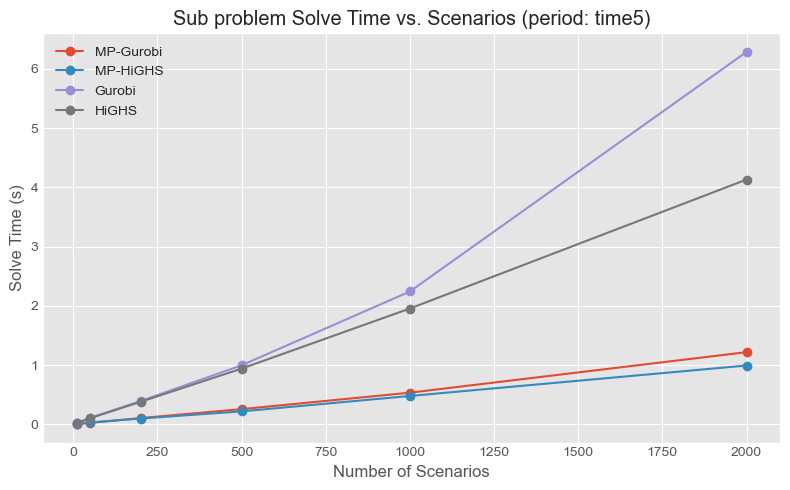

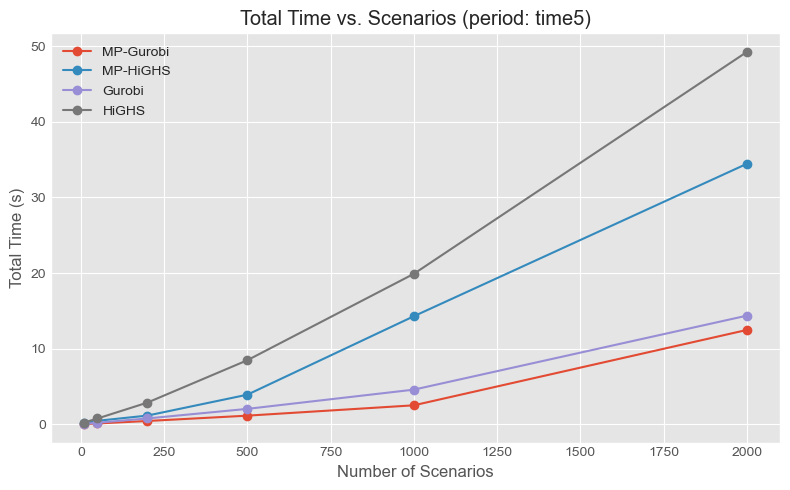

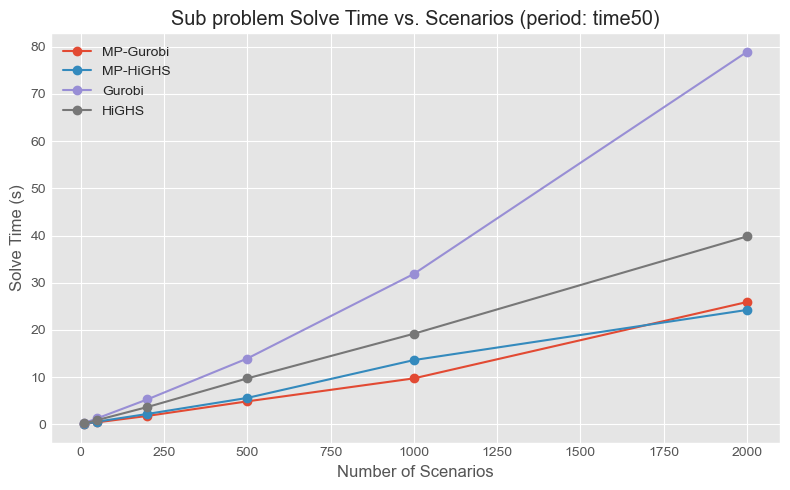

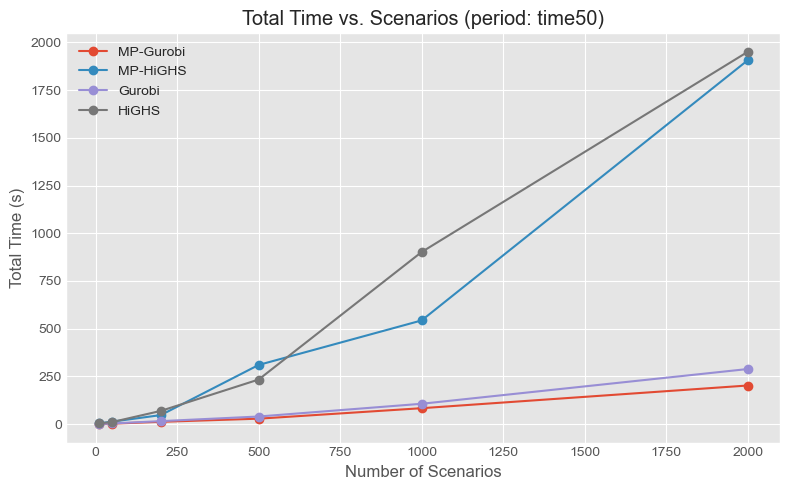

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Use a built-in style
plt.style.use("ggplot")

# Column names and labels
solve_cols = [
    'MP_Gurobi_solve', 'MP_HiGHS_solve',
    'Plasmo_Gurobi_solve', 'Plasmo_HiGHS_solve'
]
total_cols = [
    'MP_Gurobi_total', 'MP_HiGHS_total',
    'Plasmo_Gurobi_total', 'Plasmo_HiGHS_total'
]
solver_labels = {
    'MP_Gurobi_solve': 'MP-Gurobi',
    'MP_HiGHS_solve': 'MP-HiGHS',
    'Plasmo_Gurobi_solve': 'Gurobi',
    'Plasmo_HiGHS_solve': 'HiGHS',
    'MP_Gurobi_total': 'MP-Gurobi',
    'MP_HiGHS_total': 'MP-HiGHS',
    'Plasmo_Gurobi_total': 'Gurobi',
    'Plasmo_HiGHS_total': 'HiGHS',
}

# Create a folder to save figures
os.makedirs("timing_plots", exist_ok=True)

# Process each file
csv_files = sorted(glob.glob("timing_results_time*.csv"))
for file in csv_files:
    df = pd.read_csv(file)
    time_tag = os.path.splitext(os.path.basename(file))[0].replace("timing_results_", "")

    # Solve time plot
    fig1, ax1 = plt.subplots(figsize=(8, 5))
    for col in solve_cols:
        ax1.plot(df['scens'], df[col], marker='o', label=solver_labels[col])
    ax1.set_title(f"Sub problem Solve Time vs. Scenarios (period: {time_tag})")
    ax1.set_xlabel("Number of Scenarios")
    ax1.set_ylabel("Solve Time (s)")
    ax1.legend()
    ax1.grid(True)
    fig1.tight_layout()
    fig1.savefig(f"timing_plots/solve_time_{time_tag}.png", dpi=300)
    plt.show()

    # Total time plot
    fig2, ax2 = plt.subplots(figsize=(8, 5))
    for col in total_cols:
        ax2.plot(df['scens'], df[col], marker='o', label=solver_labels[col])
    ax2.set_title(f"Total Time vs. Scenarios (period: {time_tag})")
    ax2.set_xlabel("Number of Scenarios")
    ax2.set_ylabel("Total Time (s)")
    ax2.legend()
    ax2.grid(True)
    fig2.tight_layout()
    # fig2.savefig(f"timing_plots/total_time_{time_tag}.png", dpi=300)
    plt.show()


In [10]:
import pandas as pd
import glob
import os

# Find all timing files
csv_files = sorted(glob.glob("timing_results_time*.csv"))

# Collect results
reduction_table = []

for file in csv_files:
    df = pd.read_csv(file)
    time_tag = os.path.splitext(os.path.basename(file))[0].replace("timing_results_", "")

    for i in range(len(df)):
        scens = df.loc[i, 'scens']

        # Solve time reductions
        mp_gurobi = df.loc[i, 'MP_Gurobi_solve']
        plasmo_gurobi = df.loc[i, 'Plasmo_Gurobi_solve']
        solve_reduction_gurobi = 100 * (mp_gurobi - plasmo_gurobi) / mp_gurobi

        mp_highs = df.loc[i, 'MP_HiGHS_solve']
        plasmo_highs = df.loc[i, 'Plasmo_HiGHS_solve']
        solve_reduction_highs = 100 * (mp_highs - plasmo_highs) / mp_highs

        # Total time reductions
        mp_gurobi_total = df.loc[i, 'MP_Gurobi_total']
        plasmo_gurobi_total = df.loc[i, 'Plasmo_Gurobi_total']
        total_reduction_gurobi = 100 * (mp_gurobi_total - plasmo_gurobi_total) / mp_gurobi_total

        mp_highs_total = df.loc[i, 'MP_HiGHS_total']
        plasmo_highs_total = df.loc[i, 'Plasmo_HiGHS_total']
        total_reduction_highs = 100 * (mp_highs_total - plasmo_highs_total) / mp_highs_total

        reduction_table.append({
            'time': time_tag,
            'scens': scens,
            '%Sub_problem_Solve↓ MP-Gurobi→Plasmo': round(solve_reduction_gurobi, 2),
            '%Sub_problem_Solve↓ MP-HiGHS→Plasmo': round(solve_reduction_highs, 2),
            '%Total↓ MP-Gurobi→Plasmo': round(total_reduction_gurobi, 2),
            '%Total↓ MP-HiGHS→Plasmo': round(total_reduction_highs, 2)
        })

# Final result table
result_df = pd.DataFrame(reduction_table)
print(result_df.to_string(index=False))

# Optionally save to CSV
result_df.to_csv("timing_percentage_reductions.csv", index=False)


  time  scens  %Sub_problem_Solve↓ MP-Gurobi→Plasmo  %Sub_problem_Solve↓ MP-HiGHS→Plasmo  %Total↓ MP-Gurobi→Plasmo  %Total↓ MP-HiGHS→Plasmo
time10     10                               -352.10                              -188.76                    -47.42                   -53.37
time10     50                               -205.12                              -193.66                    -28.76                   -27.15
time10    200                               -261.18                               -97.13                    -38.70                    16.32
time10    500                               -208.09                               -80.77                    -43.21                    56.91
time10   1000                               -197.70                               -47.72                    -41.40                    51.77
time10   2000                               -225.73                               -67.78                    -36.14                    54.26
time25     10       

In [11]:
import pandas as pd
import glob
import os

# Find all timing files
csv_files = sorted(glob.glob("timing_results_time*.csv"))

# Collect results
reduction_table = []

for file in csv_files:
    df = pd.read_csv(file)
    time_tag = os.path.splitext(os.path.basename(file))[0].replace("timing_results_", "")

    # Add 1.1 sec to MP solve and total times
    df['MP_Gurobi_solve'] += 1.1
    df['MP_Gurobi_total'] += 1.1
    df['MP_HiGHS_solve'] += 1.1
    df['MP_HiGHS_total'] += 1.1

    for i in range(len(df)):
        scens = df.loc[i, 'scens']

        # Solve time reductions
        mp_gurobi = df.loc[i, 'MP_Gurobi_solve']
        plasmo_gurobi = df.loc[i, 'Plasmo_Gurobi_solve']
        solve_reduction_gurobi = 100 * (mp_gurobi - plasmo_gurobi) / mp_gurobi

        # mp_highs = df.loc[i, 'MP_HiGHS_solve']
        # plasmo_highs = df.loc[i, 'Plasmo_HiGHS_solve']
        # solve_reduction_highs = 100 * (mp_highs - plasmo_highs) / mp_highs

        # Total time reductions
        mp_gurobi_total = df.loc[i, 'MP_Gurobi_total']
        plasmo_gurobi_total = df.loc[i, 'Plasmo_Gurobi_total']
        total_reduction_gurobi = 100 * (mp_gurobi_total - plasmo_gurobi_total) / mp_gurobi_total

        # mp_highs_total = df.loc[i, 'MP_HiGHS_total']
        # plasmo_highs_total = df.loc[i, 'Plasmo_HiGHS_total']
        # total_reduction_highs = 100 * (mp_highs_total - plasmo_highs_total) / mp_highs_total

        reduction_table.append({
            'time': time_tag,
            'scens': scens,
            '%Sub_problem_Solve↓ MP-Gurobi→Plasmo': round(solve_reduction_gurobi, 2),
            # '%Sub_problem_Solve↓ MP-HiGHS→Plasmo': round(solve_reduction_highs, 2),
            '%Total↓ MP-Gurobi→Plasmo': round(total_reduction_gurobi, 2)
            # '%Total↓ MP-HiGHS→Plasmo': round(total_reduction_highs, 2)
        })

# Final result table
result_df = pd.DataFrame(reduction_table)
print(result_df.to_string(index=False))

# Save to CSV
result_df.to_csv("timing_percentage_reductions.csv", index=False)


  time  scens  %Sub_problem_Solve↓ MP-Gurobi→Plasmo  %Total↓ MP-Gurobi→Plasmo
time10     10                                 96.06                     89.64
time10     50                                 79.11                     59.33
time10    200                                 26.29                     12.37
time10    500                                -32.19                    -17.98
time10   1000                                -86.31                    -29.49
time10   2000                               -153.26                    -31.89
time25     10                                 88.75                     70.28
time25     50                                 56.41                     30.36
time25    200                                -24.62                    -16.66
time25    500                                -83.45                    -26.01
time25   1000                               -164.31                    -32.67
time25   2000                               -170.48             

In [12]:
import pandas as pd
import glob
import os

# Find all timing files
csv_files = sorted(glob.glob("timing_results_time*.csv"))

# Collect results
reduction_table = []

for file in csv_files:
    df = pd.read_csv(file)
    time_tag = os.path.splitext(os.path.basename(file))[0].replace("timing_results_", "")

    # Add 1.1 sec to MP solve and total times
    df['MP_Gurobi_solve'] += 1.1
    df['MP_Gurobi_total'] += 1.1
    df['MP_HiGHS_solve'] += 1.1
    df['MP_HiGHS_total'] += 1.1

    for i in range(1,len(df)):
        scens = df.loc[i, 'scens']

        # Solve time reductions
        mp_gurobi = df.loc[i, 'MP_Gurobi_solve']
        plasmo_gurobi = df.loc[i, 'Plasmo_Gurobi_solve']
        solve_reduction_gurobi = 100 * (mp_gurobi - plasmo_gurobi) / mp_gurobi
        

        # Total time reductions
        mp_gurobi_total = df.loc[i, 'MP_Gurobi_total']
        plasmo_gurobi_total = df.loc[i, 'Plasmo_Gurobi_total']
        total_reduction_gurobi = 100 * (mp_gurobi_total - plasmo_gurobi_total) / mp_gurobi_total


        reduction_table.append({
            'time': time_tag,
            'scens': scens,
            '%Sub_problem_Solve↓ MP-Gurobi→Plasmo': round(solve_reduction_gurobi, 2),
            '%Total↓ MP-Gurobi→Plasmo': round(total_reduction_gurobi, 2)
        })

result_df = pd.DataFrame(reduction_table)
print(result_df.to_string(index=False))

# Save to CSV
# result_df.to_csv("timing_percentage_reductions.csv", index=False)


  time  scens  %Sub_problem_Solve↓ MP-Gurobi→Plasmo  %Total↓ MP-Gurobi→Plasmo
time10     50                                 79.11                     59.33
time10    200                                 26.29                     12.37
time10    500                                -32.19                    -17.98
time10   1000                                -86.31                    -29.49
time10   2000                               -153.26                    -31.89
time25     50                                 56.41                     30.36
time25    200                                -24.62                    -16.66
time25    500                                -83.45                    -26.01
time25   1000                               -164.31                    -32.67
time25   2000                               -170.48                    -34.37
 time5     50                                 90.43                     81.94
 time5    200                                 67.39             